## Predicting the Survivors of Titanic using Machine Learning with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Name'].count()

891

The data consists of 891 titanic passengers

In [4]:
# The total number of passengers categorized by class are:
df.groupby(by = 'Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [5]:
# The total number of passengers that survived by class are:
df.groupby(by = 'Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

The result shows that:
1. About 63% of the first class pasengers were saved.
2. About 47% of the second class passengers were saved.
3. About 24% of the third class passengers were saved.

This clearly indicates that First class people were given a lot of priority and were saved more.

In [6]:
# For age less than 10: Kids
age10 = df[df['Age']<10].sort_values('Age')

In [7]:
age10.count()['Sex']

62

There are 62 children of age less than 10.

In [8]:
#Children categorized by classes
age10.groupby('Pclass')['Survived'].count()

Pclass
1     3
2    17
3    42
Name: Survived, dtype: int64

In [9]:
#Children survived
age10.groupby('Pclass')['Survived'].sum()

Pclass
1     2
2    17
3    19
Name: Survived, dtype: int64

In [10]:
train = df
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now let's visualize out data

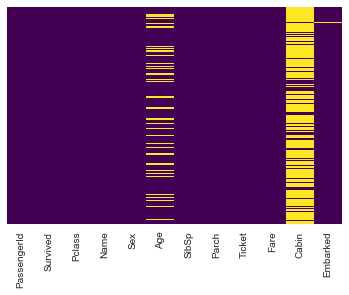

In [11]:
#Checking for the missing values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis' )

The yellow spots indicate the missing values. A large number of values from the Cabin column are missing. We will mostly ignore the column or convert to "Yes" or "No". The age column values are also missing and mostly will be imputed.

In [12]:
df.groupby('Survived').count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

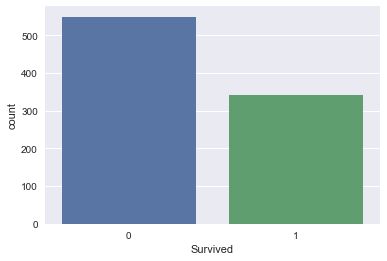

In [13]:
sns.countplot(x='Survived', data = df)

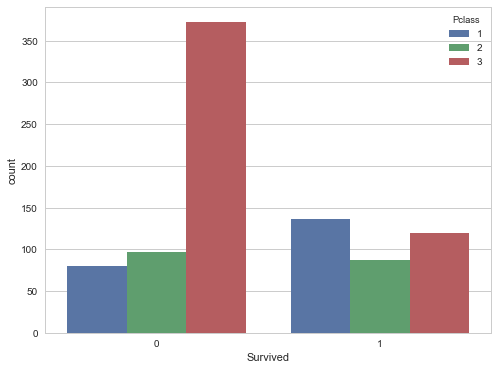

In [14]:
# Looking at the survival categorizing by class

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x= 'Survived', data = train, hue = 'Pclass')


We can see that, first class passengers were taken care first. Among the passengers who lost their lives, majority were from the Third class

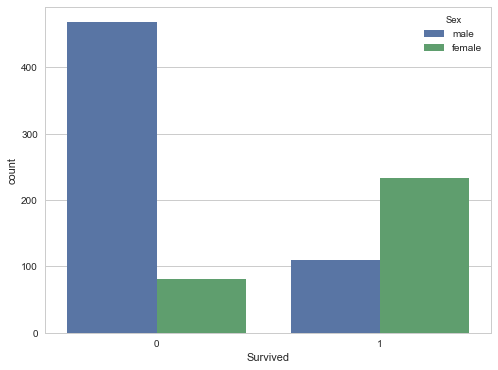

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

# Females were taken care first. 

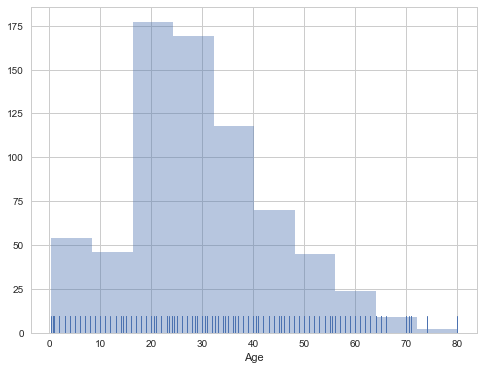

In [16]:
#Distribution of Age of the passengers
plt.figure(figsize=(8,6))
sns.distplot(train['Age'].dropna(), bins = 10, kde = False, rug = True)

#It is very important to use the drop.na method. 
# It will show an error if it is not used. So for any future distplot, which might possible have null values, include drop.na

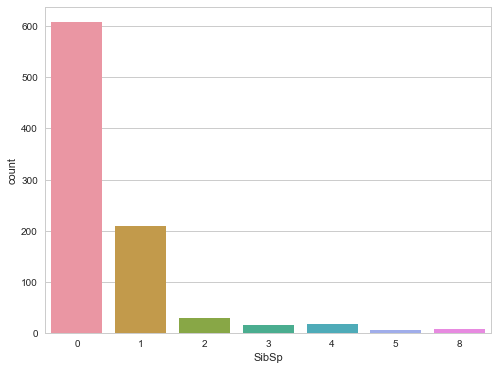

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(train['SibSp'])
#Majority of the passengers were either single or were couples

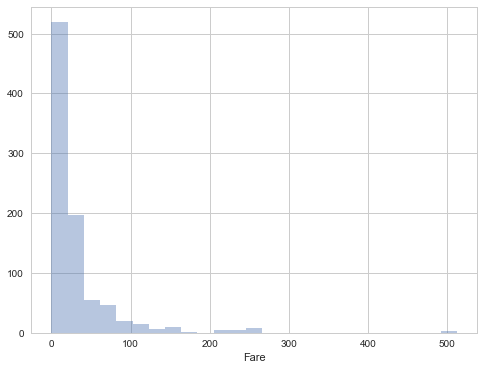

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(train['Fare'], bins=25, kde = False)
# The price of the ticket is very wide spread. But we can notice that majority were bought between 0 and 150.

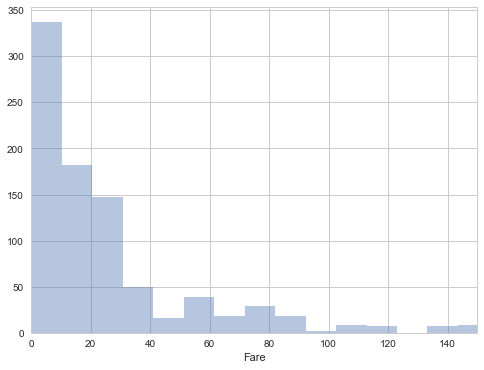

In [19]:
# Let's focus on the tickets price from 0 to 150 in detail and find the counts.

plt.figure(figsize=(8,6))
plt.xlim(0,150)
plt.xticks(np.arange(0,150,20))
sns.distplot(train['Fare'], bins=50, kde = False)

Using cufflinks to produce interactive plots

In [20]:
import plotly 
plotly.tools.set_credentials_file(username='RutanshuDesai', api_key='DimXg6lmei7VKokjgPVN')

In [21]:
import cufflinks as cf
cf.go_offline

<function cufflinks.offline.go_offline>

In [22]:
# Scatter plot between Age and Fare paid. And this plot does not make any sense.
train.iplot(kind = 'scatter', x = 'Age', y = 'Fare', mode = 'markers', yrange=[0,200], title = 'Fare vs Age',xTitle = 'Age', yTitle='Fare')

In [23]:
# Using interactive plotly to show barplots of survical of passengers categorized by different classes.

train.groupby(by='Pclass').sum()['Survived'].iplot(kind='bar',title = 'Survival vs Class', xTitle = 'Class', yTitle = 'Survived Passengers')

In [24]:
train.iplot(kind='box', title='Boxes')

In [25]:
#Distribution of age. 
train['Age'].iplot(kind = 'hist', xTitle = 'Age', yTitle = 'Passengers')

### Mean Ages for different classes. I will use this for imputing the missing values.

In [26]:
train[['Age', 'Pclass']].head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [27]:
age_by_class = train.groupby('Pclass').mean()['Age']
age_by_class 

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [28]:
train.groupby('Pclass').mean()['Age'].iplot(kind='bar')

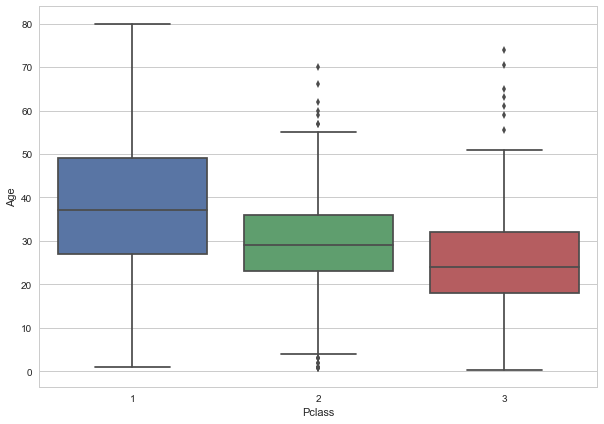

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot('Pclass', 'Age', data=train)

In [30]:
age_by_class = train.groupby('Pclass').mean()['Age']
age_by_class 

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

### We will impute the ages as:
##### Class 1 = 38
#####  Class 2 = 30
#####  Class 3 = 25

In [31]:
# Formulating the function to impute. Will use the apply method
cols = train[['Age', 'Pclass']].loc[0]
cols.iloc[0:2]

Age       22.0
Pclass     3.0
Name: 0, dtype: float64

In [32]:
cols[0]

22.0

In [33]:
train2 = train

Next, I will define a function so as to insert the imputed values in the DataFrame.

In [34]:
def impute(cols):
    Age = cols[0] 
    Pclass = cols[1] 
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 30
        if Pclass == 3:
            return 25
    else:
        return Age

In [35]:
train['Age'] = train[['Age','Pclass']].apply(impute, axis = 1)

In [36]:
#Checking for Null values
train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

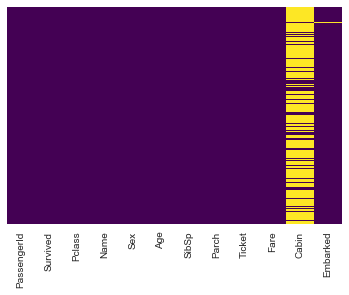

In [37]:
sns.heatmap(train.isnull(), cbar =False, yticklabels= False, cmap='viridis')

We can see from the above plot that the missing values from the Age column has been imputed and so the plot shows no missing values.

In [38]:
# checking some of the imputed ages
train[train['Age']==38].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,38.0,0,0,19947,35.5000,C52,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN


In [39]:
# Since Cabin had a lot of null values. We totally drop that column
train.drop('Cabin',inplace =True, axis =1)

In [40]:
# One row in the embarked column in having null value. So we remove that observation.
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
# This code drops all the observations with null values in any column
train.dropna(inplace = True)

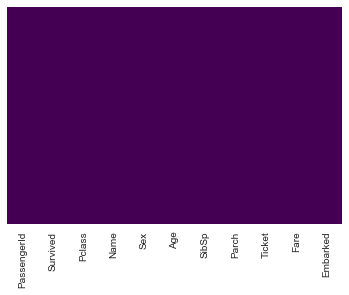

In [42]:
# Again we check for the missing values, if any.
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap = 'viridis')

The data has been cleaned and all the missing values have been either imputed or removed. This was the first step of cleaning the data. Next step is to prepare the data for the Machine Learning algorithm.

In [43]:
# Converting gender into categorical variable
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [44]:
# Converting the three classes into categorical variables.
Pclass = pd.get_dummies(train['Pclass'], drop_first=True)
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [45]:
train['Embarked'].unique()
# There are only three values and so the column is converted into categorical col.

array(['S', 'C', 'Q'], dtype=object)

In [46]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [48]:
# Dropping the columns not required for the machine learning
train.drop(['Sex', 'Embarked', 'Pclass', 'Name', 'Ticket'], axis =1, inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [50]:
#Concatening the three new categorical cols
train = pd.concat([train, sex, embark, Pclass], axis =1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
2              889 non-null uint8
3              889 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


In [51]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


### This is an extra exercise and not a continuation of the actual prediction process. I am trying to insert age 25 in all of the missing age values. 

In [52]:
train2 = pd.read_csv('titanic_train.csv')
train2[train2.isnull()['Age']].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [53]:
def impute2(Age):
    
    if pd.isnull(Age):
        return 25
    else:
        return Age

In [54]:
train2['Age'] = train2['Age'].apply(impute2)

In [55]:
train2[train2['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [56]:
# This entry previously had age NaN. After the funstion is 
train2.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                          25
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [57]:
train.drop('PassengerId', inplace=True, axis = 1)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived    889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
2           889 non-null uint8
3           889 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.0 KB


In [59]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Machine Learning: Logistic Regression

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = train.drop('Survived', axis =1)
y = train['Survived']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
X_train.count()['Age']
# Roughly 70% of our data

622

In [64]:
X_test.count()['Age']
# roughly 30% of our data

267

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logit = LogisticRegression()

In [67]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
predictions = logit.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [69]:
pred = pd.DataFrame(predictions, columns=['Predicted_Survival'])

In [70]:
pred.head()

,Predicted_Survival
0,0
1,0
2,1
3,1
4,0


In [71]:
pred.count()

Predicted_Survival    267
dtype: int64

In [72]:
X_test.count()['Age']

267

In [73]:
pred.loc[0]

Predicted_Survival    0
Name: 0, dtype: int64

In [74]:
X_test.reset_index(inplace=True)

In [75]:
X_test.drop('index', axis=1, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [76]:
X_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,25.0,0,0,8.05,1,0,1,0,1
1,25.0,0,0,7.75,1,1,0,0,1
2,24.0,1,2,65.00,0,0,1,1,0
3,41.0,0,0,134.50,0,0,0,0,0
4,25.0,0,0,15.50,1,1,0,0,1


In [77]:
final_pred=pd.concat([X_test,pred], axis=1)
final_pred.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Predicted_Survival
0,25.0,0,0,8.05,1,0,1,0,1,0
1,25.0,0,0,7.75,1,1,0,0,1,0
2,24.0,1,2,65.00,0,0,1,1,0,1
3,41.0,0,0,134.50,0,0,0,0,0,1
4,25.0,0,0,15.50,1,1,0,0,1,0


In [78]:
actual_classification = pd.DataFrame(y_test)
actual_classification.head()

,Survived
511,0
613,0
615,1
337,1
718,0


In [79]:
actual_classification.reset_index(inplace=True)

In [80]:
actual_classification.drop('index',axis=1, inplace=True)
actual_classification.head()

,Survived
0,0
1,0
2,1
3,1
4,0


In [81]:
final_result = pd.concat([final_pred,actual_classification], axis=1)
final_result.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Predicted_Survival,Survived
0,25.0,0,0,8.05,1,0,1,0,1,0,0
1,25.0,0,0,7.75,1,1,0,0,1,0,0
2,24.0,1,2,65.00,0,0,1,1,0,1,1
3,41.0,0,0,134.50,0,0,0,0,0,1,1
4,25.0,0,0,15.50,1,1,0,0,1,0,0


## Evaluation of the model

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86       163
          1       0.83      0.65      0.73       104

avg / total       0.81      0.81      0.81       267



In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 36,  68]])

## Final Conclusion

149 were predicted to be non-survivors (and actually did not survive, from y_test). 68 were predicted to be survivors (and actually survived).

14 passengers were predicted to be survived (however, actually they did not survive) and 36 passengers were predicted to be survived (actually they did not survive).

So, the accuracy of the model is about 81%.
